[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

[Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [ ]:
# Import the libraries


# Import data from Social_Network_Ads.csv file into a DataFrame
df = 


In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
# Define the feature and target values

X = 
y = 

In [ ]:
# FEATURE SCALING


# create instances of StandardScaler
sc = 

# transform X using fit_transform method of sc
X = 

In [ ]:
# Split X, y into X_train, X_test, y_train, y_test with 7.5:2.5 ratio


X_train, X_test, y_train, y_test = 

In [ ]:
# Build a Logistic Regression model on the Training Set


clf = 
# fit

LogisticRegression(random_state=0)

In [ ]:
# Predict the test set results y_pred (y_hat) from X_test 

y_pred = 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# Compute Confussion Matrix


cm = 

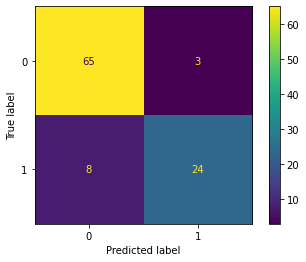

In [ ]:
# Display Confusion Matrix
disp = 

plt.show()

In [ ]:
# Import metrics from sklearn

# Accuracy Score
print('Accuracy = ', )
# Precision Score
print('Precision = ', )
# Recall Score
print('Recall = ', )
# F1 Score
print('F1_Score = ', )


Accuracy =  0.89
Precision =  0.8888888888888888
Recall =  0.75
F1_Score =  0.8135593220338982


In [ ]:
# Predict y_hat for Age=30,	EstimatedSalary=87000



array([0])

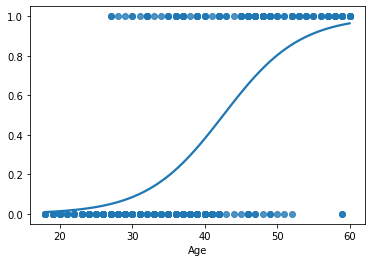

In [ ]:
# Visualise the Logistic Regression on the whole dataset
# (i.e., only 1 feature: 'Age')
import seaborn as sns

sns.regplot(x=df['Age'], y=y, data=df, logistic=True, ci=None)

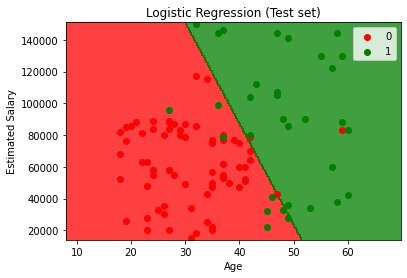

In [ ]:
# Visualise the Decision Surface on Test set results

from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

# Define bounds of the domain
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10
min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000

# Define the x and y scale
# step = 0.25 means all the pixels were actually with a 0.25 resolution
x1_grid = np.arange(min1, max1, 0.25)
x2_grid = np.arange(min2, max2, 0.25)

# Create the grid
# step=0.25 means all the pixels were actually with a 0.25 resolution
X1, X2 = np.meshgrid(x1_grid, x2_grid)

# Flatten each grid to a vector
r1, r2 = X1.flatten(), X2.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# Horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# Make predictions for the grid
y_hat = clf.predict(sc.transform(grid))

# Reshape the predictions back into a grid
y_hat = y_hat.reshape(X1.shape)

# Plot the grid of X1, X2 and y_hat values as a surface
# (This is the line applying the classifier on all the pixel observation points,
# it colors all the red pixel points and the green pixel points,
# make the contour between red and green regions)
plt.contourf(X1, X2, y_hat, alpha = 0.75, cmap=ListedColormap(('red', 'green')))

# Plot the limits of the Age and the Estimated Salary lines
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plots all the data points that are the real values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 